<a href="https://colab.research.google.com/github/ejrtks1020/Deep_learning_library/blob/main/_1_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0(TensorFlow)_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로우 (Tensorflow)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" width="300">

- 가장 널리 쓰이는 딥러닝 프레임워크 중 하나

- 구글이 주도적으로 개발하는 플랫폼

- 파이썬, C++ API를 기본적으로 제공하고,  
  자바스크립트(JavaScript), 자바(Java), 고(Go), 스위프트(Swift) 등 다양한 프로그래밍 언어를 지원

- tf.keras를 중심으로 고수준 API 통합 (2.x 버전)

- TPU(Tensor Processing Unit) 지원
  - TPU는 GPU보다 전력을 적게 소모, 경제적
  
  - 일반적으로 32비트(float32)로 수행되는 곱셈 연산을 16비트(float16)로 낮춤

## 텐서플로우 아키텍쳐

<img src="https://developers.google.com/machine-learning/crash-course/images/TFHierarchy.svg">

<sub>출처: https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/toolkit</sub>

## 텐서플로우 시작하기

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.6.0


### 텐서(Tensor)의 객체
- 타입(Type): `string`, `float32`, `float16`, `int32`, `int8` 등

- 형상(Shape): 0, 1, 2차원 등의 데이터 차원 

- 축(Rank): 차원의 개수

### 텐서의 차원과 연산

In [ ]:
a = tf.constant(2)
print(tf.rank(a)) #현재 랭크는 0차원
print(a)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [ ]:
b = tf.constant([2,3])
print(tf.rank(b))
print(b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([2 3], shape=(2,), dtype=int32)


In [ ]:
c = tf.constant([[2,3], [6, 7]])
print(tf.rank(c))
print(c)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[2 3]
 [6 7]], shape=(2, 2), dtype=int32)


In [ ]:
d = tf.constant(['Hello'])
print(tf.rank(d))
print(d)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([b'Hello'], shape=(1,), dtype=string)


### 난수 생성

In [ ]:
rand = tf.random.uniform([1], 0, 1) # shape은 1, 최소 0 ~ 최대 1을 가지는 난수
print(rand.shape)
print(rand)

(1,)
tf.Tensor([0.02285385], shape=(1,), dtype=float32)


In [ ]:
rand2 = tf.random.normal([1,2], 0, 1) # shape = 1 by 2, 평균 0 , 표준편차가 1을 가지는 정규분포
print(rand2.shape)
print(rand2)

(1, 2)
tf.Tensor([[ 0.14279614 -1.2844381 ]], shape=(1, 2), dtype=float32)


In [ ]:
rand3 = tf.random.normal(shape = (3, 2) , mean = 0, stddev = 1)
print(rand3.shape)
print(rand3)


(3, 2)
tf.Tensor(
[[-0.27329668  0.84253407]
 [ 1.6158901   0.9895226 ]
 [-0.3380772   0.5062702 ]], shape=(3, 2), dtype=float32)


### 즉시 실행 모드 (Eager Mode) 지원
- 즉시 실행모드를 통해 텐서플로우를 파이썬처럼 사용할 수 있음

- 1.x 버전에서는 '그래프'를 생성하고, 초기화 한 뒤에 세션을 통해 **값을 흐르게 하는 작업**을 진행해야함


In [ ]:
a = tf.constant(2)
b = tf.constant(3)

In [ ]:
print(tf.add(a, b))
print(a + b)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [ ]:
print(tf.subtract(a,b))
print(a - b)

tf.Tensor(-1, shape=(), dtype=int32)
tf.Tensor(-1, shape=(), dtype=int32)


In [ ]:
print(tf.multiply(a, b))
print(a * b)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


### 텐서 플로우 ↔ 넘파이
- `numpy()`
- `tf.convet_to_tensor()`

In [ ]:
c = tf.add(a, b).numpy()
print(type(c))

<class 'numpy.int32'>


In [ ]:
c_square = np.square(c , dtype = np.float32)
c_tensor = tf.convert_to_tensor(c_square)
print(c_tensor)
print(type(c_tensor))

tf.Tensor(25.0, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### 넘파이처럼 사용하기


In [ ]:
t = tf.constant([[1., 2., 3.] , [4., 5., 6.]])
print(t.shape)
print(t.dtype)

(2, 3)
<dtype: 'float32'>


In [ ]:
print(t[:, 1:])

tf.Tensor(
[[2. 3.]
 [5. 6.]], shape=(2, 2), dtype=float32)


In [ ]:
t[... , 1:3, tf.newaxis]

<tf.Tensor: shape=(2, 2, 1), dtype=float32, numpy=
array([[[2.],
        [3.]],

       [[5.],
        [6.]]], dtype=float32)>

In [ ]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [ ]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [ ]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### 타입 변환
- 텐서의 기본 dtype
  - float형 텐서: `float32`
  - int형 텐서: `int32`

- 연산시 텐서의 타입을 맞춰줘야 함
  - `float32` ~ `float32`
  - `int32` ~ `int32`
  - `flot32` ~ `int32` (x)

- 타입변환에는 `tf.cast()` 사용

In [ ]:
a = tf.constant(2)
print(a)

b = tf.constant(2.)
print(b)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
#tf.constant(2.) + tf.constant(40) # 타입이 다르면 연산 안됨

In [ ]:
# tf.constant(2.) + tf.constant(40. , dtype = tf.float64) # 비트수가 다르기 때문에 연산 안됨

In [ ]:
t = tf.constant(30. , dtype = tf.float64)
t2 = tf.constant(2.)
print(t2 + tf.cast(t, tf.float32))

tf.Tensor(32.0, shape=(), dtype=float32)


### AutoGraph (오토그래프)

- Tensorflow가 작업을 좀 더 빠르게 동작하게 하기 위한 방법으로 Graph로 만들어 연산을 진행

- `tf.Graph`

- 유연성이 있음

  - 모바일 애플리케이션, 임베디드 기기, 백엔드 서버와 같이 Python 인터프리터가 없는 환경에서 Tensorflow 사용 가능 

In [ ]:
import timeit

### @tf.function
- 자동으로 그래프를 생성(Auto Graph)

- 그래프로 변환하여 사용 -> GPU 연산 가능

- 파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 때 사용가능


- 원본 함수가 필요하다면 `(tf.function).python_function()`

In [ ]:
@tf.function
def my_function(x):
  return x **2  -10 *x  + 3

print(my_function(2))
print(my_function(tf.constant(2)))

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)


In [ ]:
def my_function_(x):
  return x **2  -10 *x  + 3

print(my_function_(2))
print(my_function_(tf.constant(2)))

-13
tf.Tensor(-13, shape=(), dtype=int32)


In [ ]:
tf_my_function_ = tf.function(my_function_)

print(tf_my_function_)
print(tf_my_function_(2))

tf.Tensor(-13, shape=(), dtype=int32)


In [ ]:
tf_my_function_.python_function(2)

-13

In [ ]:
def function_to_get_faster(x, y, b):
  x = tf.matmul(x, y)
  x = x + b
  return x

a_function_that_uses_a_graph = tf.function(function_to_get_faster)

x1 = tf.constant([[1.0, 2.0]])
y1 = tf.constant([[2.0], [3.0]])
b1 = tf.constant(4.0)

a_function_that_uses_a_graph(x1, y1, b1).numpy()

array([[12.]], dtype=float32)

In [ ]:
def inner_function(x, y, b):
  x = tf.matmul(x, y)
  x = x + b
  return x

@tf.function
def outer_function(x):
  y = tf.constant([[2.0], [3.0]])
  b = tf.constant(4.0)
  return inner_function(x, y ,b)

outer_function(tf.constant([[1.0, 2.0]])).numpy()

array([[12.]], dtype=float32)

텐서플로우가 `tf.function`으로 변환한 코드

In [ ]:
print(tf.autograph.to_code(my_function.python_function))
print(tf.autograph.to_code(tf_my_function_.python_function))
print(tf.autograph.to_code(outer_function.python_function))

def tf__my_function(x):
    with ag__.FunctionScope('my_function', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def tf__my_function_(x):
    with ag__.FunctionScope('my_function_', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def 


 속도 향상


In [ ]:
class SequentialModel(tf.keras.Model):
  def __init__(self, **kwargs):
    super(SequentialModel, self).__init__(**kwargs)
    self.flatten = tf.keras.layers.Flatten(input_shape = (28, 28))
    self.dense_1 = tf.keras.layers.Dense(128, activation = 'relu')
    self.dropout = tf.keras.layers.Dropout(0.2)
    self.dense_2 = tf.keras.layers.Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.dropout(x)
    x = self.dense_2(x)
    return x1

input_data =tf.random.uniform([60, 28, 28])

eager_model = SequentialModel()
graph_model = tf.function(eager_model)

print('Eager time:' , timeit.timeit(lambda: eager_model(input_data), number = 10000))
print('Graph time:' , timeit.timeit(lambda: graph_model(input_data), number = 10000))

Eager time: 11.624750728999999
Graph time: 4.413400414999998


### 변수 생성

- `tf.Variable`
- 딥러닝 모델 학습 시, 그래프 연산이 필요할 때 사용

In [ ]:
X = tf.Variable(20.0)
print(X)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


### Autograd (자동 미분)

- `tf.GradientTape` API를 사용
- `tf.Variable` 같은 일부 입력에 대한 기울기 계산
  - 기본적으로 한번만 사용됨
- 변수가 포함된 연산만 기록

In [ ]:
x = tf.Variable(3.0)
with tf.GradientTape() as tape:
  y = x ** 2

In [ ]:
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [ ]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y_sq = y**2
  z = x ** 2 + tf.stop_gradient(y_sq)

grad = tape.gradient(z, {'x' : x, 'y' : y})
print('dz/dx:', grad['x'])
print('dz/dy:', grad['y'])

dz/dx: tf.Tensor(4.0, shape=(), dtype=float32)
dz/dy: None


In [ ]:
weights = tf.Variable(tf.random.normal((3,2)), name = 'weights')
biases = tf.Variable(tf.zeros(2, dtype = tf.float32), name = 'biases')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent = True) as tape:
  y = x @  weights + biases
  loss =tf.reduce_mean(y ** 2)
  

In [ ]:
[dl_dw, dl_db] = tape.gradient(loss, [weights, biases])

In [ ]:
print(weights.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [ ]:
weights2 = tf.Variable(tf.random.normal((3,2)), name = 'weights2')
biases2  = tf.Variable(tf.zeros(2, dtype = tf.float32), name = 'biases2')
x2 = [[4., 5., 6.]]

[dl_dw2, dl_db2] = tape.gradient(loss ,[weights2, biases2])

print(weights2.shape)
#print(dl_dw2.shape)

(3, 2)


## 간단한 신경망 구조 

### 뉴런
- 입력 → 연산 → 활성화함수 → 출력

In [ ]:
def sigmoid(x):
  return ( 1 / (1 + np.exp(-x)))

def Neuron(x, W, bias = 0):
  z =x * W + bias
  return sigmoid(z)


In [ ]:
x = tf.random.normal((1,2), 0, 1)
W = tf.random.normal((1,2), 0, 1)

print('x.shape:', x.shape)
print('W.shape:', W.shape)

print(x)
print(W)
print(Neuron(x, W))

x.shape: (1, 2)
W.shape: (1, 2)
tf.Tensor([[ 0.22499289 -0.107784  ]], shape=(1, 2), dtype=float32)
tf.Tensor([[-0.9454728  0.5892356]], shape=(1, 2), dtype=float32)
[[0.4470185 0.4841278]]


In [ ]:
x = tf.random.normal((2,1), 0, 1)
W = tf.random.normal((2,1), 0, 1)

print('x.shape:', x.shape)
print('W.shape:', W.shape)

print(x)
print(W)
print(Neuron(x, W))

x.shape: (2, 1)
W.shape: (2, 1)
tf.Tensor(
[[-0.9479242 ]
 [-0.65960854]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[-0.7991881]
 [-1.2696595]], shape=(2, 1), dtype=float32)
[[0.6808259 ]
 [0.69793385]]


In [ ]:
x = tf.random.normal((1,), 0, 1)
W = tf.random.normal((2,1), 0, 1)

print('x.shape:', x.shape)
print('W.shape:', W.shape)

print(x)
print(W)
print(Neuron(x, W))

x.shape: (1,)
W.shape: (2, 1)
tf.Tensor([-0.8449868], shape=(1,), dtype=float32)
tf.Tensor(
[[ 0.68931544]
 [-0.38490635]], shape=(2, 1), dtype=float32)
[[0.35836616]
 [0.580601  ]]


### 퍼셉트론 학습 알고리즘 (가중치 업데이트)

## $\qquad w^{(next step)} = w + \eta \ (y - \tilde{y}) \ x$

- $w \ $: 가중치

- $\eta \ $ : 학습률

- $y \ $ : 정답 레이블

- $\tilde{y} \ $: 예측 레이블


In [ ]:
x = 1
y = 0
W = tf.random.normal([1], 0, 1)
print(Neuron(x, W))
print('y:', y)

[0.47572514]
y: 0


In [ ]:
for i in range (1000):
  output = Neuron(x, W)
  error = y - output
  W = W + x * 0.1 * error

  if i % 100  == 99:
    print("{}\t{}\t{}".format(i+1, error, output))

100	[-0.10017796]	[0.10017796]
200	[-0.05180425]	[0.05180425]
300	[-0.03459967]	[0.03459967]
400	[-0.02589485]	[0.02589485]
500	[-0.02066206]	[0.02066206]
600	[-0.01717659]	[0.01717659]
700	[-0.01469127]	[0.01469127]
800	[-0.01283087]	[0.01283087]
900	[-0.01138666]	[0.01138666]
1000	[-0.01023339]	[0.01023339]


In [ ]:
def Neuron2(x, W , bias = 0):
  z = tf.matmul(x, W , transpose_b = True) + bias
  return sigmoid(z)

In [ ]:
x = tf.random.normal((1,3), 0 , 1)
y = tf.ones(1)
W  = tf.random.normal((1,3), 0, 1)
print(Neuron2(x, W))
print('y: ', y)

[[0.43938407]]
y:  tf.Tensor([1.], shape=(1,), dtype=float32)


In [ ]:
for i in range(1000):
  output =  Neuron2(x, W)
  error = y - output
  W = W + x * 0.1 * error

  if i % 100 == 99:
    print("{}\t{}\t{}".format(i+1, error, output))

100	[[0.06337994]]	[[0.93662006]]
200	[[0.03123921]]	[[0.9687608]]
300	[[0.02060437]]	[[0.9793956]]
400	[[0.01534384]]	[[0.98465616]]
500	[[0.01221371]]	[[0.9877863]]
600	[[0.01014024]]	[[0.98985976]]
700	[[0.00866657]]	[[0.9913334]]
800	[[0.00756574]]	[[0.99243426]]
900	[[0.00671238]]	[[0.9932876]]
1000	[[0.00603151]]	[[0.9939685]]


In [ ]:
x = tf.random.normal((1,3), 0 ,1)
weights = tf.random.normal((1,3), 0 ,1)
bias = tf.zeros((1,1))

y = tf.ones((1,))

print('x\t : {}\nweights\t : {}\nbias\t : {}'.format(x, weights, bias))

x	 : [[-0.7278079  1.0968686 -1.8307259]]
weights	 : [[ 0.9758309  -0.8041236  -0.21896513]]
bias	 : [[0.]]


In [ ]:
for i in range(1000):
  output = Neuron2(x, W, bias = bias)
  error = y - output
  weights = weights + x * 0.1 * error
  bias = bias + 1 * 0.1 * error

  if i % 100 == 99:
    print('{}\t{}\t{}'.format(i+1, error, output))


100	[[0.43792117]]	[[0.56207883]]
200	[[0.09641844]]	[[0.90358156]]
300	[[0.05073011]]	[[0.9492699]]
400	[[0.03410888]]	[[0.9658911]]
500	[[0.02561659]]	[[0.9743834]]
600	[[0.02048367]]	[[0.9795163]]
700	[[0.01705271]]	[[0.9829473]]
800	[[0.01460034]]	[[0.98539966]]
900	[[0.01276129]]	[[0.9872387]]
1000	[[0.01133174]]	[[0.98866826]]


In [ ]:
print('x\t : {}\nweights\t : {}\nbias\t : {}'.format(x, weights, bias))

x	 : [[-0.7278079  1.0968686 -1.8307259]]
weights	 : [[ -8.397024  13.32155  -23.795382]]
bias	 : [[12.878184]]


### AND Gate

In [ ]:
X = np.array([[1,1], [1, 0], [0, 1] , [0 ,0]])
Y = np.array([[1], [0] , [0], [0]])
W = tf.random.normal([2], 0 ,1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum  = 0
  for j in range(4):
    output = sigmoid(np.sum(X[j] * W) + b_x + b)
    error = Y[j][0] - output
    W = W + X[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 0:
    print('Epoch {:4d}\tError Sum{}'.format(i, error_sum))

print('\n가중치\t: {}'.format(W))
print('편향\t: {}'.format(b))


Epoch    0	Error Sum[-0.75457686]
Epoch  200	Error Sum[-0.11318655]
Epoch  400	Error Sum[-0.06670984]
Epoch  600	Error Sum[-0.04718702]
Epoch  800	Error Sum[-0.03639758]
Epoch 1000	Error Sum[-0.02956861]
Epoch 1200	Error Sum[-0.02486829]
Epoch 1400	Error Sum[-0.02144003]
Epoch 1600	Error Sum[-0.01883377]
Epoch 1800	Error Sum[-0.0167843]

가중치	: [6.964906  6.9680624]
편향	: [-11.626483]


In [ ]:
for i in range(4):
  print('X: {}\tY: {}\tOutput: {}'.format(X[i], Y[i], sigmoid(np.sum(X[i]*W) + b)))

X: [1 1]	Y: [1]	Output: [0.9094127]
X: [1 0]	Y: [0]	Output: [0.00936305]
X: [0 1]	Y: [0]	Output: [0.00939237]
X: [0 0]	Y: [0]	Output: [8.9264495e-06]


### OR Gate

In [ ]:
X2 = np.array([[1,1], [1, 0], [0, 1] , [0 ,0]])
Y2 = np.array([[1], [1] , [1], [0]])
W2 = tf.random.normal([2], 0 ,1)
b2 = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum  = 0
  for j in range(4):
    output = sigmoid(np.sum(X2[j] * W2) + b_x + b2)
    error = Y2[j][0] - output
    W2 = W2 + X2[j] * 0.1 * error
    b2 = b2 + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 0:
    print('Epoch {:4d}\tError Sum{}'.format(i, error_sum))

print('\n가중치\t: {}'.format(W2))
print('편향\t: {}'.format(b2))


Epoch    0	Error Sum[-0.22539109]
Epoch  200	Error Sum[-0.04854524]
Epoch  400	Error Sum[-0.02561942]
Epoch  600	Error Sum[-0.01728087]
Epoch  800	Error Sum[-0.01299196]
Epoch 1000	Error Sum[-0.0103894]
Epoch 1200	Error Sum[-0.00864695]
Epoch 1400	Error Sum[-0.00739998]
Epoch 1600	Error Sum[-0.00646399]
Epoch 1800	Error Sum[-0.00573764]

가중치	: [8.21249  8.210662]
편향	: [-4.640249]


In [ ]:
for i in range(4):
  print('X: {}\tY: {}\tOutput: {}'.format(X2[i], Y2[i], sigmoid(np.sum(X2[i]*W2) + b2)))

X: [1 1]	Y: [1]	Output: [0.9999924]
X: [1 0]	Y: [1]	Output: [0.9726748]
X: [0 1]	Y: [1]	Output: [0.97262615]
X: [0 0]	Y: [0]	Output: [0.00956296]


### XOR Gate

In [ ]:
X3 = np.array([[1,1], [1, 0], [0, 1] , [0 ,0]])
Y3 = np.array([[0], [1] , [1], [0]])
W3 = tf.random.normal([2], 0 ,1)
b3 = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum  = 0
  for j in range(4):
    output = sigmoid(np.sum(X3[j] * W3) + b_x + b3)
    error = Y3[j][0] - output
    W3 = W3 + X3[j] * 0.1 * error
    b3 = b3 + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 0:
    print('Epoch {:4d}\tError Sum{}'.format(i, error_sum))

print('\n가중치\t: {}'.format(W3))
print('편향\t: {}'.format(b3))

Epoch    0	Error Sum[-1.4009659]
Epoch  200	Error Sum[0.00085843]
Epoch  400	Error Sum[3.4749508e-05]
Epoch  600	Error Sum[1.4305115e-06]
Epoch  800	Error Sum[5.364418e-07]
Epoch 1000	Error Sum[5.364418e-07]
Epoch 1200	Error Sum[5.364418e-07]
Epoch 1400	Error Sum[5.364418e-07]
Epoch 1600	Error Sum[5.364418e-07]
Epoch 1800	Error Sum[5.364418e-07]

가중치	: [5.1282983e-02 1.1436641e-06]
편향	: [-1.0000018]


In [ ]:
for i in range(4):
  print('X: {}\tY: {}\tOutput: {}'.format(X3[i], Y3[i], sigmoid(np.sum(X3[i]*W3) + b3)))

X: [1 1]	Y: [0]	Output: [0.2791428]
X: [1 0]	Y: [1]	Output: [0.27914256]
X: [0 1]	Y: [1]	Output: [0.2689413]
X: [0 0]	Y: [0]	Output: [0.26894107]


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(111)

X4 = np.array([[1,1], [1,0], [0,1], [0,0]])
Y4 = np.array([[0], [1], [1], [0]])

model = Sequential([Dense(units = 2, activation = 'sigmoid', input_shape = (2, )),
                    Dense(units = 1, activation = 'sigmoid')])

model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.1), loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(X4 ,Y4, epochs = 2000, batch_size = 1, verbose = 1)

Epoch 1/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2554
Epoch 2/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2553
Epoch 3/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2554
Epoch 4/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2554
Epoch 5/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2553
Epoch 6/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2553
Epoch 7/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2554
Epoch 8/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2553
Epoch 9/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2553
Epoch 10/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2554
Epoch 11/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2554
Epoch 12/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2553
Epoch 13/2000
4/4 [==============================

In [ ]:
model.predict(X4)

array([[0.33829144],
       [0.72329396],
       [0.49184707],
       [0.38257366]], dtype=float32)

## 시각화 사용

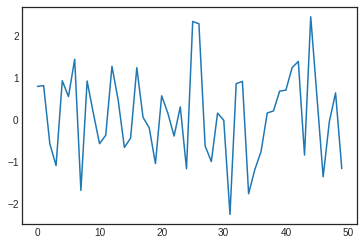

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
x = range(50)
y = tf.random.normal([50], 0, 1)
plt.plot(x,y)
plt.show()

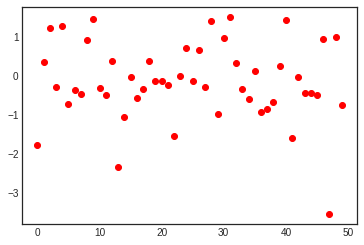

In [ ]:

x = range(50)
y = tf.random.normal([50], 0, 1)
plt.plot(x,y, 'ro')
plt.show()

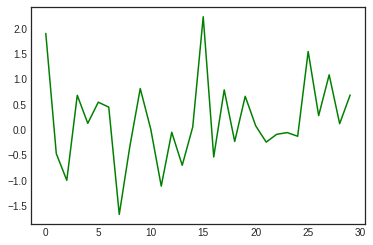

In [ ]:

x = range(30)
y = tf.random.normal([30], 0, 1)
plt.plot(x,y, 'g-')
plt.show()

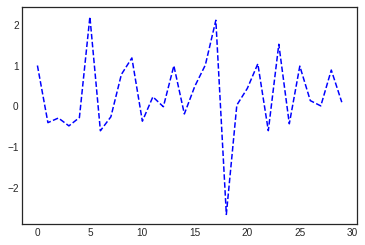

In [ ]:
x = range(30)
y = tf.random.normal([30], 0, 1)
plt.plot(x,y, 'b--')
plt.show()

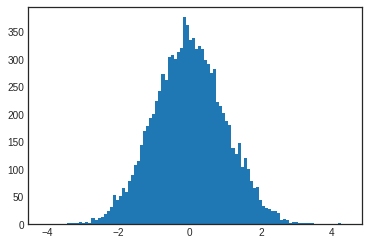

In [ ]:
random_normal = tf.random.normal([10000], 0, 1)
plt.hist(random_normal, bins = 100)
plt.show()

### XOR Gate의 'LOSS' 시각화


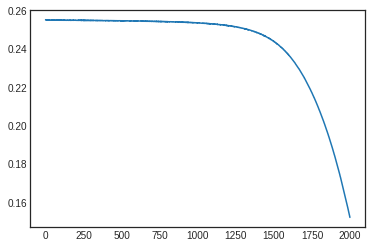

In [ ]:
plt.plot(history.history['loss'])